### Pregunta 7
A partir del siguiente grafo ponderado no dirigido, aplique los pasos del Algoritmo de Kruskal para:

a. (1pto) De forma manual: Construir el árbol de expansión mínimo(MST)  
b. (1pto) De forma manual: Determinar el peso del MST obtenido. 
(2 ptos)   
c. Utilizando el código del Algoritmo Kruskal, refrendar la solucion manual a nivel de grafo y peso minimo del MST resultante en a y b

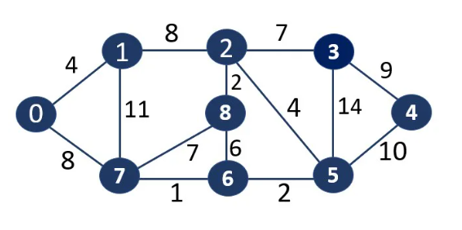


### **Solución**  
Hallamos de manera manual  

![Resolución manual de Kruskal](img/kruskal-manual-2.png)

In [1]:
#Importamos las librearias necesarias
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Creamos la matriz de adyacencia
graph = {
    '0': {'1': 4, '7': 8},
    '1': {'0': 4, '2': 8, '7': 11},
    '2': {'1': 8, '8': 2, '5':4, '3': 7},
    '3': {'2': 7, '5': 14, '4': 9},
    '4': {'3': 9, '5': 10},
    '5': {'4':10, '2': 4, '3': 14, '6': 2},
    '6': {'5': 2, '8': 6, '7': 1},
    '7': {'0': 8, '1': 11, '8': 7, '6': 1},
    '8': {'2': 2, '6': 6, '7': 7}
}

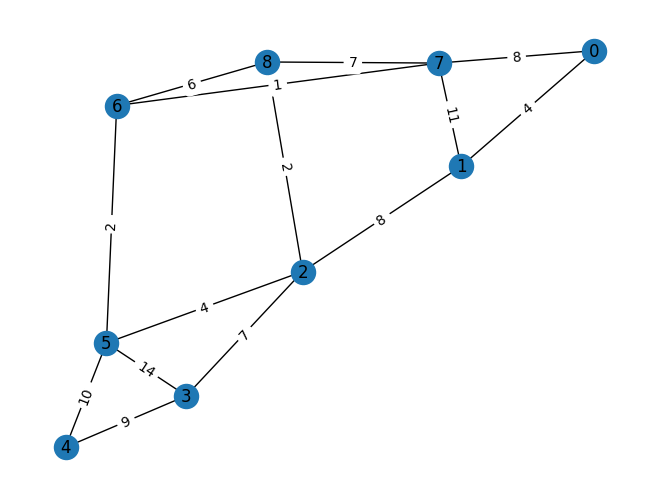

In [13]:
#Creamos el grafo
G = nx.Graph(graph)


#Agregamos los nodos
G.add_nodes_from(graph.keys())

#Agregamos las aristas
for node, edges in graph.items():
    for edge, weight in edges.items():
        G.add_edge(node, edge, weight=weight)

#Dibujamos el grafo con sus respectivos pesos
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [14]:
# Clase para representar un conjunto de elementos disjuntos
class UnionFind:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def find(self, v):
        if self.parent[v] != v:
            self.parent[v] = self.find(self.parent[v])
        return self.parent[v]

    def union(self, v1, v2):
        root1 = self.find(v1)
        root2 = self.find(v2)

        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

# Función para encontrar el árbol de expansión mínima utilizando Kruskal
def kruskal(graph):
    edges = []
    for node, edges_dict in graph.items():
        for edge, weight in edges_dict.items():
            edges.append((weight, node, edge))

    edges.sort()

    vertices = set(graph.keys())
    mst = []
    uf = UnionFind(vertices)

    for weight, u, v in edges:
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            mst.append((u, v, weight))

    return mst

# Obtener el árbol de expansión mínima utilizando Kruskal
mst = kruskal(graph)
print("Kruskal")
print(mst)

# Calcular el costo total del camino mínimo
coste_total = sum(weight for _, _, weight in mst)
print("Coste total del camino")
print(coste_total)

Kruskal
[('6', '7', 1), ('2', '8', 2), ('5', '6', 2), ('0', '1', 4), ('2', '5', 4), ('2', '3', 7), ('0', '7', 8), ('3', '4', 9)]
Coste total del camino
37
